Classic variance: 0.00022560543948695278
Antithetic variance: 2.5599504696323555e-05


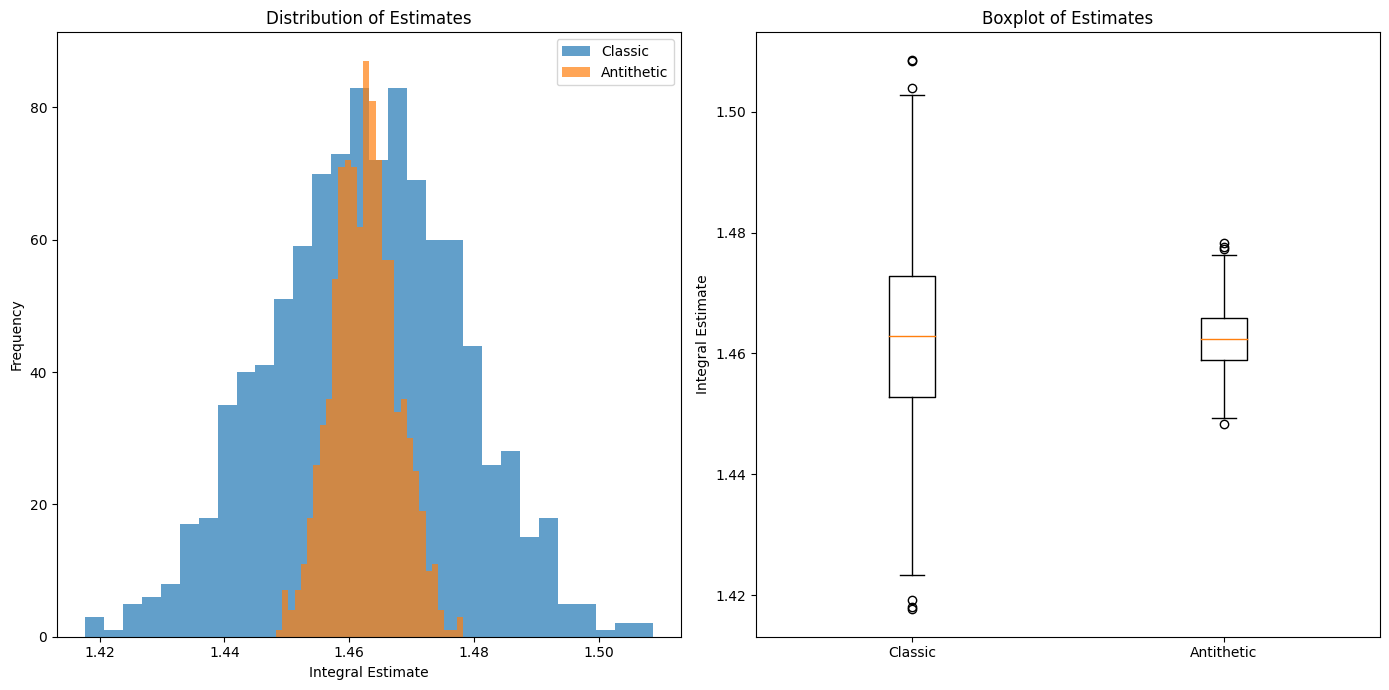

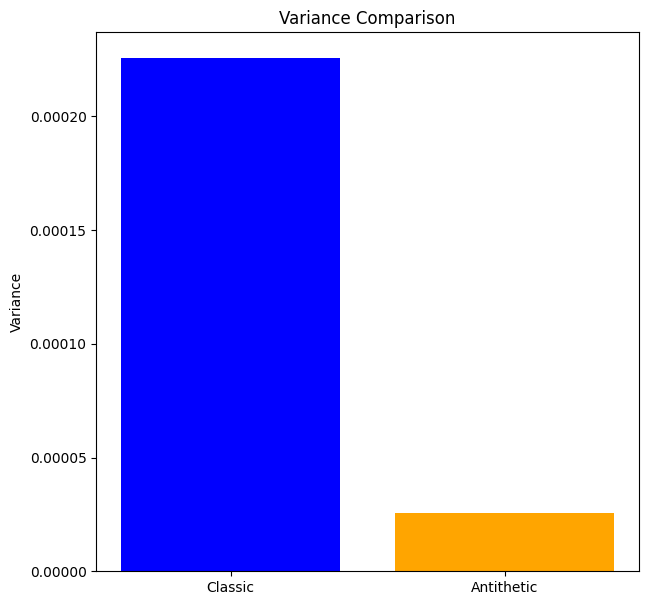

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to integrate
def f(x):
    return np.exp(x**2)

# Classic Monte Carlo estimation of the integral
def monte_carlo_classic(n):
    X = np.random.uniform(0, 1, n)
    return (1 - 0) * np.mean(f(X))

# Monte Carlo estimation with antithetic variables
def monte_carlo_antithetic(n):
    X = np.random.uniform(0, 1, n)
    X_tilde = 1 - X
    return (1 - 0) * np.mean((f(X) + f(X_tilde)) / 2)

# Simulation parameters
n_runs = 1000  # Number of simulations to estimate the variance
n_samples = 1000  # Number of samples per simulation

# Store results
classic_estimates = np.zeros(n_runs)
antithetic_estimates = np.zeros(n_runs)

# Simulation
for i in range(n_runs):
    classic_estimates[i] = monte_carlo_classic(n_samples)
    antithetic_estimates[i] = monte_carlo_antithetic(n_samples)

# Calculate variances
var_classic = np.var(classic_estimates)
var_antithetic = np.var(antithetic_estimates)

# Display results
print(f"Classic variance: {var_classic}")
print(f"Antithetic variance: {var_antithetic}")

# Plots
plt.figure(figsize=(14, 7))

# Histogram of estimates
plt.subplot(1, 2, 1)
plt.hist(classic_estimates, bins=30, alpha=0.7, label='Classic')
plt.hist(antithetic_estimates, bins=30, alpha=0.7, label='Antithetic')
plt.title('Distribution of Estimates')
plt.xlabel('Integral Estimate')
plt.ylabel('Frequency')
plt.legend()

# Boxplot of estimates
plt.subplot(1, 2, 2)
plt.boxplot([classic_estimates, antithetic_estimates], labels=['Classic', 'Antithetic'])
plt.title('Boxplot of Estimates')
plt.ylabel('Integral Estimate')

plt.tight_layout()
plt.show()

# Variance comparison plot
plt.figure(figsize=(7, 7))
plt.bar(['Classic', 'Antithetic'], [var_classic, var_antithetic], color=['blue', 'orange'])
plt.title('Variance Comparison')
plt.ylabel('Variance')

plt.show()


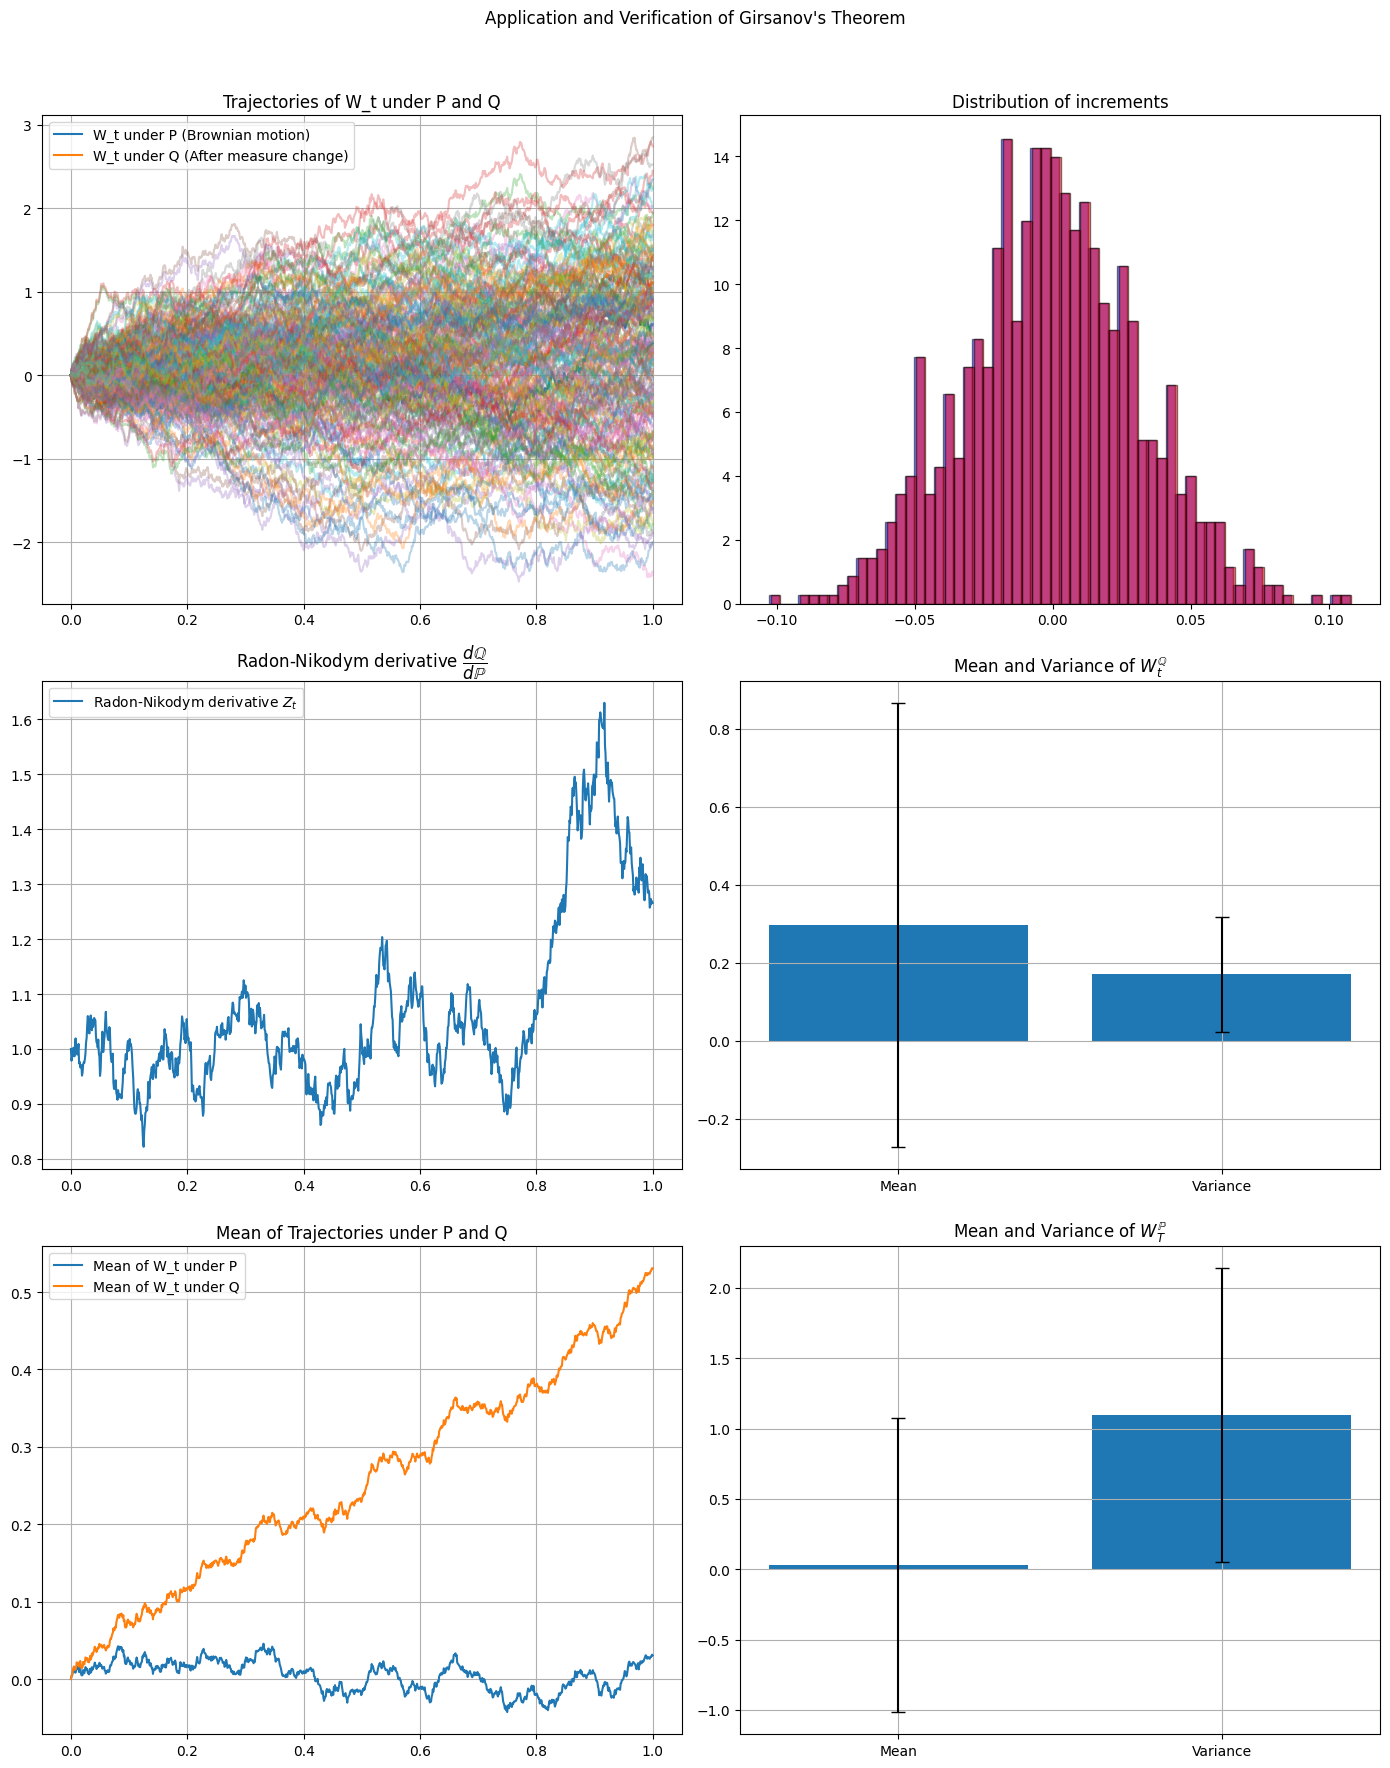

In [65]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Parameters of the simulation
T = 1.0  # Time horizon
N = 1000  # Number of time steps
dt = T / N  # Time step size
t = np.linspace(0, T, N+1)  # Time discretization
theta = 0.5  # Constant drift for simplicity
num_simulations = 100  # Number of simulations

# Initialize for multiple plots
fig, axs = plt.subplots(3, 2, figsize=(14, 18))
fig.suptitle('Application and Verification of Girsanov\'s Theorem')

# Store trajectories for calculating the mean
trajectories_W = np.zeros((num_simulations, N+1))
trajectories_W_Q = np.zeros((num_simulations, N+1))

for i in range(num_simulations):
    # Generate Brownian motion W_t under measure P
    dW = np.random.normal(0, np.sqrt(dt), size=N)
    W = np.cumsum(dW)
    W = np.insert(W, 0, 0)  # W_0 = 0

    # Calculate Brownian motion under Q using Girsanov
    W_Q = W + theta * t

    # Store trajectories
    trajectories_W[i] = W
    trajectories_W_Q[i] = W_Q

    # Plot trajectories for one simulation
    if i == 0:
        axs[0, 0].plot(t, W, label='W_t under P (Brownian motion)')
        axs[0, 0].plot(t, W_Q, label='W_t under Q (After measure change)')
    else:
        axs[0, 0].plot(t, W, alpha=0.3)
        axs[0, 0].plot(t, W_Q, alpha=0.3)
axs[0, 0].set_title('Trajectories of W_t under P and Q')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Comparison of increments
dW_Q = dW + theta * dt
axs[0, 1].hist(dW, bins=60, alpha=0.5, label='dW under P', density=True, color='blue', edgecolor='black')
axs[0, 1].hist(dW_Q, bins=60, alpha=0.5, label='dW under Q', density=True, color='red', edgecolor='black')
axs[0, 1].set_title('Distribution of increments')

# Calculate the Radon-Nikodym derivative
Z_t = np.exp(-theta * W - 0.5 * theta**2 * t)
axs[1, 0].plot(t, Z_t, label='Radon-Nikodym derivative $Z_t$')
axs[1, 0].set_title('Radon-Nikodym derivative $\dfrac{d\mathbb{Q}}{d\mathbb{P}}$')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Verify the mean and variance of the processes under Q
mean_W_Q = []
var_W_Q = []
for i in range(num_simulations):
    dW = np.random.normal(0, np.sqrt(dt), size=N)
    W = np.cumsum(dW)
    W = np.insert(W, 0, 0)  # W_0 = 0
    W_Q = W + theta * t
    mean_W_Q.append(np.mean(W_Q))
    var_W_Q.append(np.var(W_Q))
axs[1, 1].bar(['Mean', 'Variance'], [np.mean(mean_W_Q), np.mean(var_W_Q)], yerr=[np.std(mean_W_Q), np.std(var_W_Q)], capsize=5)
axs[1, 1].set_title('Mean and Variance of $W_t^{\mathbb{Q}}$')
axs[1, 1].grid(True)

# Calculate and plot the mean of the trajectories under P and Q
mean_trajectory_W = np.mean(trajectories_W, axis=0)
mean_trajectory_W_Q = np.mean(trajectories_W_Q, axis=0)
axs[2, 0].plot(t, mean_trajectory_W, label='Mean of W_t under P')
axs[2, 0].plot(t, mean_trajectory_W_Q, label='Mean of W_t under Q')
axs[2, 0].set_title('Mean of Trajectories under P and Q')
axs[2, 0].legend()
axs[2, 0].grid(True)

# Mean and variance of W_T under P
W_T = trajectories_W[:, -1]
mean_W_T_P = np.mean(W_T)
var_W_T_P = np.var(W_T)
axs[2, 1].bar(['Mean', 'Variance'], [mean_W_T_P, var_W_T_P], yerr=[np.std(W_T), np.std(W_T)], capsize=5)
axs[2, 1].set_title('Mean and Variance of $W_T^{\mathbb{P}}$')
axs[2, 1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()